In [1]:
import requests
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
LEC = pd.read_csv('projectData/LEC_RESULT.csv', index_col=0, encoding='CP949')
LEC['version'] = LEC['version'].str.replace('버전','')
LEC['version'] = LEC['version'].str.replace(' ','')
LEC['version'] = LEC['version'].str.replace('<!----><!---->','')
ind = LEC[LEC['version'] == '11.5'].index
LEC = LEC.drop(index=ind)

In [3]:
LCS = pd.read_csv('projectData/LCS3_RESULT.csv', index_col=0, encoding='CP949')
LCS['version'] = LCS['version'].str.replace('버전','')
LCS['version'] = LCS['version'].str.replace(' ','')
LCS['version'] = LCS['version'].str.replace('<!----><!---->','')
ind = LCS[LCS['version'] == '11.5'].index
LCS = LCS.drop(index=ind)

In [4]:
LCK = pd.read_csv('projectData/LCK_RESULT.csv', index_col=0)
LCK['version'] = LCK['version'].str.replace('버전','')
LCK['version'] = LCK['version'].str.replace(' ','')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215 entries, 0 to 1214
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_date          1215 non-null   object
 1   version            1215 non-null   object
 2   team1_name         1215 non-null   object
 3   team1_score        1215 non-null   int64 
 4   team2_score        1215 non-null   int64 
 5   team2_name         1215 non-null   object
 6   gametime           1215 non-null   object
 7   blue_team          1215 non-null   object
 8   blue_score         1215 non-null   int64 
 9   blue_ban           1215 non-null   object
 10  blue_object        1215 non-null   object
 11  blue_object_count  1215 non-null   int64 
 12  blue_call_name     1215 non-null   object
 13  blue_line          1215 non-null   object
 14  blue_champion      1215 non-null   object
 15  blue_kill          1215 non-null   int64 
 16  blue_death         1215 non-null   object


In [5]:
LEC_object = LEC[['blue_object','blue_object_count','red_object','red_object_count']]
LCK_object = LCK[['blue_object','blue_object_count','red_object','red_object_count']]
LCS_object = LCS[['blue_object','blue_object_count','red_object','red_object_count']]

In [6]:
LEC_object_turret = LEC_object[LEC_object['blue_object'] == 'turret@blue']
LCS_object_turret = LCS_object[LCS_object['blue_object'] == 'turret@blue']
LCK_object_turret = LCK_object[LCK_object['blue_object'] == 'turret@blue']

In [10]:
LCK_turret = LCK_object_turret.drop(columns=['blue_object','red_object'])
LEC_turret = LEC_object_turret.drop(columns=['blue_object','red_object'])
LCS_turret = LCS_object_turret.drop(columns=['blue_object','red_object'])

In [20]:
a = LCK_turret.sum()/256
b = LEC_turret.sum()/124
c = LCS_turret.sum()/182

In [ ]:
# 색상 변경( 기본 설정 )
sns.set_palette('BrBG')

In [61]:
aa = []

In [64]:
for i in (c):
    print(i)
    aa.append(i)

6.065934065934066
6.082417582417582


In [65]:
aa

[5.875,
 5.4609375,
 6.669354838709677,
 6.975806451612903,
 6.065934065934066,
 6.082417582417582]

In [48]:
name = ['LCK_blue','LCK_red','LEC_blue','LEC_red','LCS_blue','LCS_red']

In [87]:
sns.set_palette('Pastel2')

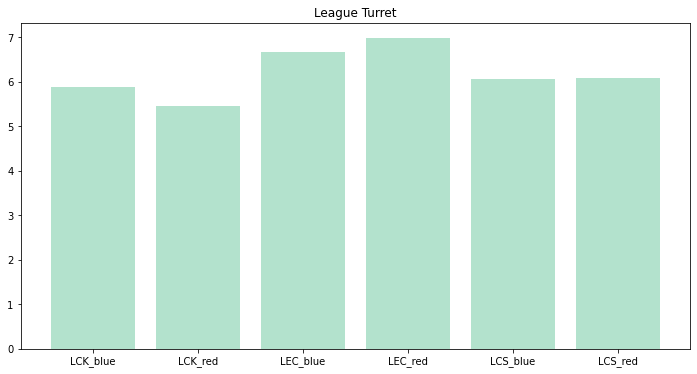

In [88]:
# y축 이름 변경
flg, ax = plt.subplots(figsize = (12,6))
ax.bar(name, aa)
plt.title('League Turret')
plt.show()

In [105]:
a =LCK['blue_champion'].value_counts().head(5)
b = LCK['red_champion'].value_counts().head(5)

In [97]:
# 그래프 설정
plt.rcParams['font.family']= 'Malgun Gothic'
# plt.rcParams['font.family']= 'AppleGothic'
plt.rcParams['font.size']  = 16
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['axes.unicode_minus'] = False

In [101]:
sns.set_palette('Pastel2')

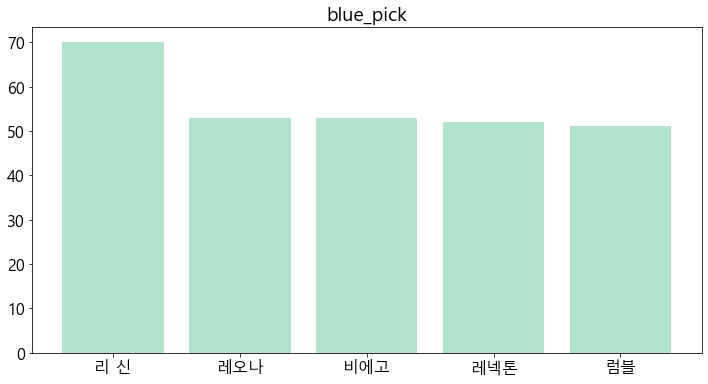

In [106]:
flg, ax = plt.subplots(figsize = (12,6))
ax.bar(a.index, a.values)
plt.title('blue_pick')
plt.show()

In [108]:
sns.set_palette('Pastel1')

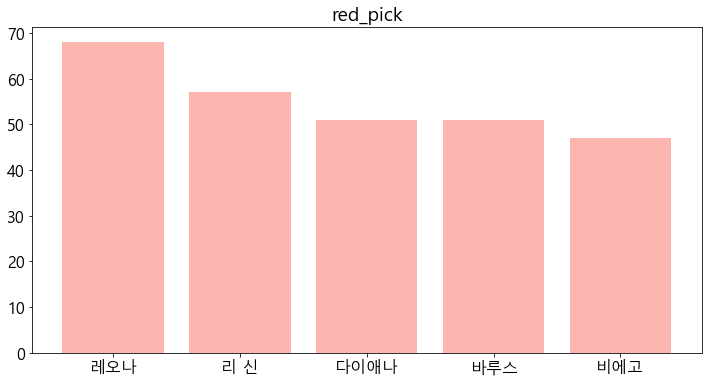

In [109]:
flg, ax = plt.subplots(figsize = (12,6))
ax.bar(b.index, b.values)
plt.title('red_pick')
plt.show()

In [111]:
LCK_baron = LCK_object[LCK_object['blue_object'] == 'baron@blue']
LCK_baron = LCK_baron.drop(columns=['blue_object','red_object'])
LEC_baron = LEC_object[LCK_object['blue_object'] == 'baron@blue']
LEC_baron = LEC_baron.drop(columns=['blue_object','red_object'])

<ipython-input-111-bcfe8b6a7953>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  LEC_baron = LEC_object[LCK_object['blue_object'] == 'baron@blue']


In [116]:
LCK_baron.sum()

blue_object_count    179
red_object_count     163
dtype: int64

In [114]:
LEC_baron.sum()

blue_object_count     89
red_object_count     108
dtype: int64

In [119]:
a =LCS['blue_champion'].value_counts().head(5)
b = LCS['red_champion'].value_counts().head(5)

In [120]:
sns.set_palette('Pastel2')

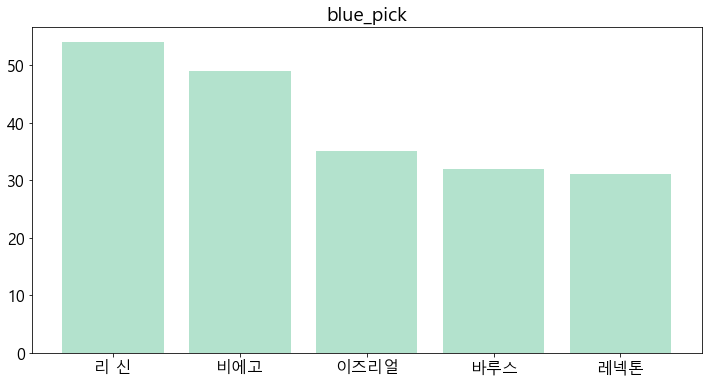

In [121]:
flg, ax = plt.subplots(figsize = (12,6))
ax.bar(a.index, a.values)
plt.title('blue_pick')
plt.show()

In [122]:
sns.set_palette('Pastel1')

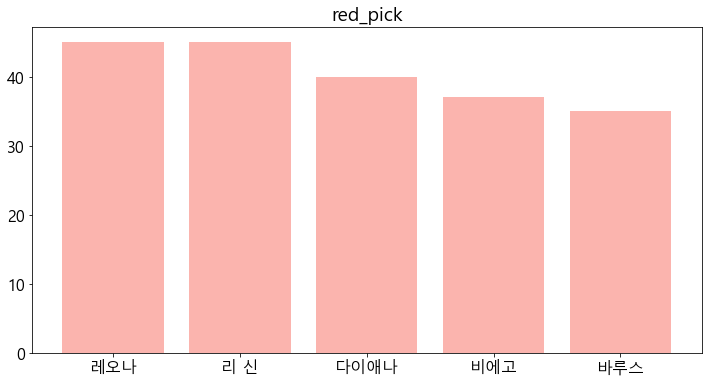

In [123]:
flg, ax = plt.subplots(figsize = (12,6))
ax.bar(b.index, b.values)
plt.title('red_pick')
plt.show()

In [124]:
d = LCS_object[LCS_object['blue_object'] == 'baron@blue']
LCS_baron= d.drop(columns=['blue_object','red_object'])

In [126]:
LCS_baron.value_counts()

blue_object_count  red_object_count
0                  1                   58
1                  0                   56
0                  2                   20
1                  1                   13
2                  0                   12
0                  0                    8
                   3                    5
1                  2                    4
2                  1                    3
1                  3                    1
3                  0                    1
dtype: int64